In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
NUM_OF_SIMULATIONS = 100

In [38]:
def stock_monte_carlo(S0, mu, sigma, N=1000):
    result = []

    # number of simulations - possible S(t) realizations
    for _ in range(NUM_OF_SIMULATIONS):
        prices = [S0]
        for _ in range(N):
            stock_price = prices[-1] * np.exp((mu-0.5*sigma**2) + sigma * np.random.normal())
            
            prices.append(stock_price)
        
        result.append(prices)
    
    simulation_data = pd.DataFrame(result).T
    
    simulation_data["mean"] = simulation_data.mean(axis=1)
    
    return(simulation_data)

In [39]:
def plot_monte_carlo(data):
    plt.figure(figsize=(10, 5))
    plt.plot(data.drop("mean", axis=1))
    plt.plot(data["mean"], linewidth=5, color="blue")
    plt.show()  

In [40]:
def main():
    data = stock_monte_carlo(50, 0.0002, 0.01)
    plot_monte_carlo(data)

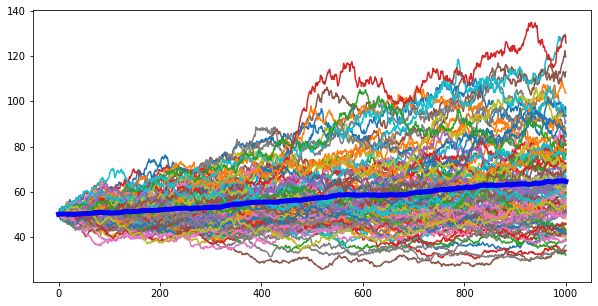

In [41]:
if __name__ == "__main__":
    main()